##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [5]:
from sklearn.metrics import classification_report

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

##### Importing Dataset

In [7]:
d1 = pd.read_csv("Social_Network_Ads.csv")

In [7]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.shape

(400, 5)

In [11]:
dataset.shape

(400, 5)

In [9]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [12]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,400.0,NaN,NaN,NaN,15691539.7575,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400.0,NaN,NaN,NaN,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,NaN,NaN,NaN,69742.5,34096.960282,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,NaN,NaN,NaN,0.3575,0.479864,0.0,0.0,0.0,1.0,1.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

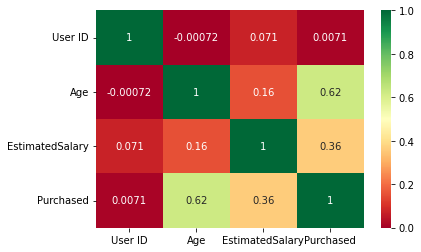

In [15]:
sns.heatmap(dataset.corr(), annot =True,  cmap = 'RdYlGn')

In [16]:
dataset.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [18]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
# check class balance
dataset["Purchased"].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [24]:
dataset[dataset.Gender=="Male"]["Purchased"].value_counts(normalize=True)

0    0.663265
1    0.336735
Name: Purchased, dtype: float64

In [8]:
dataset[dataset.Gender=="Female"]["Purchased"].value_counts(normalize=True)

0    0.622549
1    0.377451
Name: Purchased, dtype: float64

In [13]:
130/196, 127/204

(0.6632653061224489, 0.6225490196078431)

##### Extracting  Variables

In [8]:
X = dataset[["Age", "EstimatedSalary"]]

In [9]:
#X = dataset.iloc[    : ,[2,3]].values
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
Y = dataset.iloc[   :,4].values
Y = dataset["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

##### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, train_size=0.8, random_state=183 )
X_train

,Age,EstimatedSalary
3,27,57000
310,42,70000
171,34,115000
219,59,143000
57,28,79000
...,...,...
116,35,75000
389,48,35000
385,56,60000
252,48,134000


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

##### Feature Scaling

In [13]:
X_train

,Age,EstimatedSalary
164,33,69000
332,42,65000
29,31,18000
301,48,74000
72,20,23000
...,...,...
380,42,64000
310,42,70000
389,48,35000
43,30,15000


In [69]:
#s1.fit_transform(X_train)

In [55]:
s1 = StandardScaler()
s1.fit_transform(X_train)
X_test = s1.transform(X_test)

In [57]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
X_test = standard_Scaler.transform(X_test)

In [60]:
X_train

array([[-0.42911487, -0.03317888],
       [ 0.46419035, -0.15407724],
       [-0.62762715, -1.57463308],
       [ 1.05972717,  0.11794409],
       [-1.71944464, -1.42351012],
       [-0.03209033,  0.0574949 ],
       [ 0.76195876, -0.75856909],
       [ 0.86121489, -0.3354248 ],
       [ 1.35749557, -1.42351012],
       [-0.03209033,  0.69221134],
       [ 0.76195876, -1.33283634],
       [ 0.56344649,  1.90119503],
       [-1.22316396, -1.1212642 ],
       [ 0.06716581,  0.02727031],
       [-0.92539555, -0.45632317],
       [ 0.46419035,  0.60153756],
       [ 1.1589833 , -0.15407724],
       [ 1.65526398, -1.33283634],
       [-0.03209033,  0.02727031],
       [-1.12390783, -0.81901828],
       [ 2.2508008 , -0.84924287],
       [ 1.05972717,  0.60153756],
       [ 0.96047103, -1.09103961],
       [-0.13134647, -0.48654776],
       [ 0.76195876, -1.45373471],
       [-0.13134647, -0.54699694],
       [ 1.05972717, -1.1212642 ],
       [-1.12390783, -0.54699694],
       [-0.03209033,

##### Instantiating and fitting the model to training Dataset

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
log_reg_model1 = LogisticRegression()
log_reg_model1.fit( X_train, y_train)



LogisticRegression()

In [58]:
#y_test

In [35]:
y_test_preds = log_reg_model1.predict(X_test)
y_train_preds = log_reg_model1.predict(X_train)

In [37]:
print("accuracy on train:", accuracy_score(y_train, y_train_preds))
print("accuracy on test:", accuracy_score(y_test, y_test_preds))

accuracy on train: 0.865625
accuracy on test: 0.8


### build model


In [38]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

### predict on train and test



In [39]:
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

In [40]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [41]:
log_reg_model1.predict_proba( X_test)

array([[0.74679361, 0.25320639],
       [0.98785039, 0.01214961],
       [0.9949061 , 0.0050939 ],
       [0.9814747 , 0.0185253 ],
       [0.88007838, 0.11992162],
       [0.82905499, 0.17094501],
       [0.44863478, 0.55136522],
       [0.58430661, 0.41569339],
       [0.9273638 , 0.0726362 ],
       [0.95291682, 0.04708318],
       [0.52732443, 0.47267557],
       [0.2490492 , 0.7509508 ],
       [0.66719609, 0.33280391],
       [0.99664674, 0.00335326],
       [0.0618998 , 0.9381002 ],
       [0.10775205, 0.89224795],
       [0.78889635, 0.21110365],
       [0.8256329 , 0.1743671 ],
       [0.21590821, 0.78409179],
       [0.99865913, 0.00134087],
       [0.05604008, 0.94395992],
       [0.94300609, 0.05699391],
       [0.49388917, 0.50611083],
       [0.5224072 , 0.4775928 ],
       [0.618072  , 0.381928  ],
       [0.97264691, 0.02735309],
       [0.53188999, 0.46811001],
       [0.72207472, 0.27792528],
       [0.33697869, 0.66302131],
       [0.94509006, 0.05490994],
       [0.

### check accuracy on train and test : check for overfit or underfit issues


In [42]:
print("Accuracy on train:", accuracy_score(y_train, y_train_pred))
print("Accuracy on test:", accuracy_score(y_test, y_test_pred))

Accuracy on train: 0.865625
Accuracy on test: 0.8


In [43]:
precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)

(0.8571428571428571, 0.7916666666666666)

In [44]:
recall_score(y_train, y_train_preds), recall_score(y_test, y_test_preds)

(0.7433628318584071, 0.6333333333333333)

### classification report 

In [45]:
print(classification_report( y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       207
           1       0.86      0.74      0.80       113

    accuracy                           0.87       320
   macro avg       0.86      0.84      0.85       320
weighted avg       0.87      0.87      0.86       320



In [77]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.79      0.63      0.70        30

    accuracy                           0.80        80
   macro avg       0.80      0.77      0.78        80
weighted avg       0.80      0.80      0.79        80



### confusion matrix

In [78]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
confusion_matrix(y_train, y_train_pred)

array([[193,  14],
       [ 29,  84]])

<AxesSubplot:>

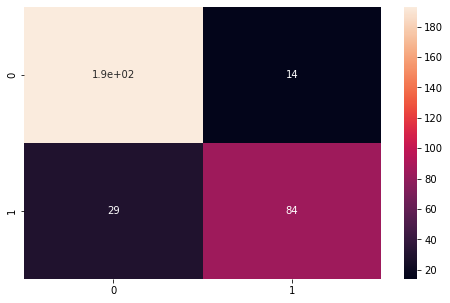

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

##### Visualizing the Training Set Result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


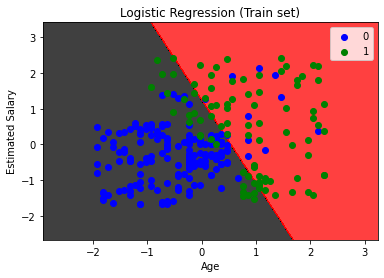

In [84]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['blue','green'])(i),label=j)

plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##### Visualizing the Testing Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


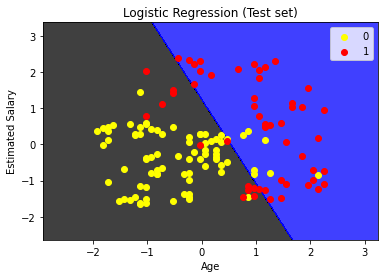

In [41]:
X_set,y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##### Mis Classification Rate

In [86]:
mis_cla_rate  = (13+7)/len(y_test)
mis_cla_rate

0.14925373134328357

##### Accuracy, Precision, Recall etc

In [53]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy:  0.8507462686567164


In [87]:
print("Precision: ", metrics.precision_score(y_test,y_test_pred))

Precision:  0.851063829787234


In [89]:
print("Recall: ", metrics.recall_score(y_test,y_test_pred))

Recall:  0.7547169811320755


##### ROC and AUC

In [81]:
y_test_proba = log_reg_model.predict_proba(X_test)
y_test_proba

array([[0.74679361, 0.25320639],
       [0.98785039, 0.01214961],
       [0.9949061 , 0.0050939 ],
       [0.9814747 , 0.0185253 ],
       [0.88007838, 0.11992162],
       [0.82905499, 0.17094501],
       [0.44863478, 0.55136522],
       [0.58430661, 0.41569339],
       [0.9273638 , 0.0726362 ],
       [0.95291682, 0.04708318],
       [0.52732443, 0.47267557],
       [0.2490492 , 0.7509508 ],
       [0.66719609, 0.33280391],
       [0.99664674, 0.00335326],
       [0.0618998 , 0.9381002 ],
       [0.10775205, 0.89224795],
       [0.78889635, 0.21110365],
       [0.8256329 , 0.1743671 ],
       [0.21590821, 0.78409179],
       [0.99865913, 0.00134087],
       [0.05604008, 0.94395992],
       [0.94300609, 0.05699391],
       [0.49388917, 0.50611083],
       [0.5224072 , 0.4775928 ],
       [0.618072  , 0.381928  ],
       [0.97264691, 0.02735309],
       [0.53188999, 0.46811001],
       [0.72207472, 0.27792528],
       [0.33697869, 0.66302131],
       [0.94509006, 0.05490994],
       [0.

In [93]:
y_test, log_reg.predict_proba(x_test)[::,1]

(array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0]),
 array([0.98983634, 0.02986917, 0.06639948, 0.93159809, 0.95145945,
        0.3230259 , 0.04170067, 0.86804831, 0.88140643, 0.03932992,
        0.34220254, 0.00853028, 0.91369034, 0.00617345, 0.00782838,
        0.28899639, 0.02395922, 0.65117918, 0.00625135, 0.97767928,
        0.64590273, 0.02279564, 0.96507949, 0.88586552, 0.42004867,
        0.53697029, 0.0511309 , 0.06718596, 0.85562743, 0.4924979 ,
        0.93615299, 0.72821091, 0.00936481, 0.92640258, 0.30063534,
        0.38880193, 0.01139632, 0.95353122, 0.07196075, 0.034964

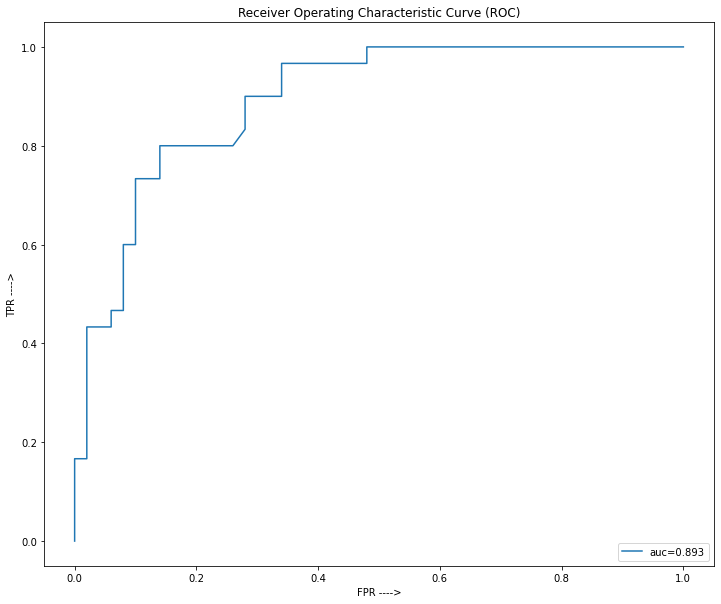

In [84]:
y_pred_proba = log_reg_model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DTC = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [24]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [26]:
y_train_pred = DTC.predict(X_train)
y_test_pred = DTC.predict(X_test)

In [27]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9172932330827067, 0.9104477611940298)

In [28]:
DTC.get_depth()

2

In [29]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9172932330827067, 0.9104477611940298)

In [30]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       176
           1       0.84      0.93      0.88        90

    accuracy                           0.92       266
   macro avg       0.90      0.92      0.91       266
weighted avg       0.92      0.92      0.92       266



In [31]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        81
           1       0.84      0.96      0.89        53

    accuracy                           0.91       134
   macro avg       0.90      0.92      0.91       134
weighted avg       0.92      0.91      0.91       134



In [85]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [87]:
dt_model = DecisionTreeClassifier()
dt_model.fit(  X_train, y_train )

DecisionTreeClassifier()

In [89]:
y_train_preds = dt_model.predict(X_train)
y_test_preds = dt_model.predict(X_test)

In [93]:
print("on train:",accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100, "%")

on train: 99.6875 %
on test: 83.75 %


In [95]:
dt_model.get_depth()

12

In [103]:
dt_model2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
dt_model2.fit(X_train, y_train )
y_train_preds = dt_model2.predict(X_train)
y_test_preds = dt_model2.predict(X_test)
print("on train:",accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100, "%")

on train: 93.75 %
on test: 86.25 %


In [106]:
dt_model3 = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=20)
dt_model3.fit(X_train, y_train )
y_train_preds = dt_model3.predict(X_train)
y_test_preds = dt_model3.predict(X_test)
print("on train:",accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100, "%")

on train: 96.875 %
on test: 83.75 %


In [107]:
dt_model2 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=28)
dt_model2.fit(X_train, y_train )
y_train_preds = dt_model2.predict(X_train)
y_test_preds = dt_model2.predict(X_test)
print("on train:",accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100, "%")

on train: 97.5 %
on test: 85.0 %


In [108]:
dt_model4 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)
dt_model4.fit(X_train, y_train )
y_train_preds = dt_model4.predict(X_train)
y_test_preds = dt_model4.predict(X_test)
print("on train:",accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100, "%")

on train: 93.125 %
on test: 86.25 %


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RF_Model1 = RandomForestClassifier(n_estimators=3, max_depth=4, random_state=183)
RF_Model1.fit( X_train, y_train )
RF_Model1

RandomForestClassifier(max_depth=4, n_estimators=3, random_state=183)

In [66]:
y_train_preds = RF_Model1.predict(X_train)
y_test_preds = RF_Model1.predict(X_test)

In [67]:
print("on train:", accuracy_score(y_train, y_train_preds))
print("on test:", accuracy_score(y_test, y_test_preds))

on train: 0.9210526315789473
on test: 0.9029850746268657


In [71]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [105]:
KNN_Model1 = KNeighborsClassifier( n_neighbors=3 )
KNN_Model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
start_time = time.time()
y_test_preds  = KNN_Model1.predict(X_test)
y_train_preds = KNN_Model1.predict(X_train)
end_time = time.time()
print("time taken:", end_time-start_time)

time taken: 0.02919602394104004


In [18]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [82]:
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_train_pred =knn_model.predict(X_train)
y_test_pred =knn_model.predict(X_test)


print("time taken to build and predict model:", time.time()-start_time)

print(confusion_matrix(y_train, y_train_pred))

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

time taken to build and predict model: 0.029160261154174805
[[162  14]
 [  9  81]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       176
           1       0.85      0.90      0.88        90

    accuracy                           0.91       266
   macro avg       0.90      0.91      0.90       266
weighted avg       0.92      0.91      0.91       266

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        81
           1       0.84      0.92      0.88        53

    accuracy                           0.90       134
   macro avg       0.90      0.91      0.90       134
weighted avg       0.91      0.90      0.90       134



In [95]:
error = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=2)     
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [96]:
error

[0.15671641791044777,
 0.17164179104477612,
 0.13432835820895522,
 0.11940298507462686,
 0.11194029850746269,
 0.11194029850746269,
 0.11194029850746269,
 0.09701492537313433,
 0.09701492537313433,
 0.09701492537313433,
 0.09701492537313433,
 0.07462686567164178,
 0.08208955223880597,
 0.07462686567164178,
 0.07462686567164178,
 0.06716417910447761,
 0.06716417910447761,
 0.06716417910447761,
 0.06716417910447761,
 0.06716417910447761,
 0.07462686567164178,
 0.06716417910447761,
 0.06716417910447761,
 0.06716417910447761,
 0.06716417910447761,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.07462686567164178,
 0.06716417910447761,
 0.08955223880597014,
 0.07462686567164178,
 0.08208955223880597,
 0.06716417910447761,
 0.0820895

Text(0, 0.5, 'Error')

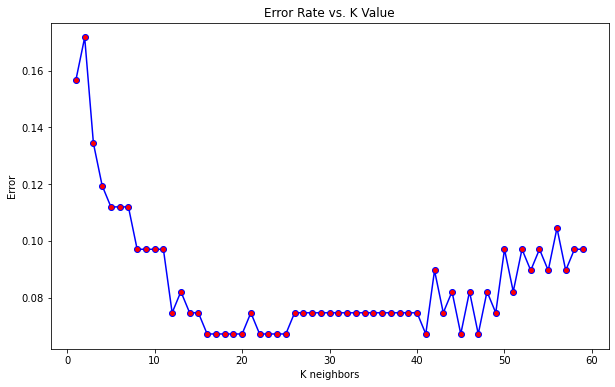

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error,color="blue", marker="o",
markerfacecolor="red")
plt.title("Error Rate vs. K Value")
plt.xlabel("K neighbors")
plt.ylabel("Error")

In [94]:
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

y_train_pred =knn_model.predict(X_train)
y_test_pred =knn_model.predict(X_test)


print("time taken to build and predict model:", time.time()-start_time)

print(confusion_matrix(y_train, y_train_pred))

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

time taken to build and predict model: 0.02067422866821289
[[162  14]
 [ 10  80]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       176
           1       0.85      0.89      0.87        90

    accuracy                           0.91       266
   macro avg       0.90      0.90      0.90       266
weighted avg       0.91      0.91      0.91       266

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        81
           1       0.89      0.92      0.91        53

    accuracy                           0.93       134
   macro avg       0.92      0.93      0.92       134
weighted avg       0.93      0.93      0.93       134



In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
p={'max_depth': [ 2,3,4,5,6,8,10], 'max_leaf_nodes':[0,2,3,4,5,6,7,8]}
DT = DecisionTreeClassifier()
DTmodels = GridSearchCV(DT, p)
DTmodels.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'max_leaf_nodes': [0, 2, 3, 4, 5, 6, 7, 8]})

In [45]:
DTmodels.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [121]:
DT_best = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3)
DT_best.fit(X_train, y_train)
y_train_preds = DT_best.predict(X_train)
y_test_preds = DT_best.predict(X_test)
print("on train:", accuracy_score(y_train, y_train_preds)*100,"%")
print("on test:", accuracy_score(y_test, y_test_preds)*100,"%")

on train: 92.5 %
on test: 87.5 %


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
DT1 = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=3)
DT1.fit(X_train, y_train)
y_train_preds = DT1.predict(X_train)
y_test_preds = DT1.predict(X_test)

In [42]:
print("Acccuray on train:", accuracy_score(y_train, y_train_preds)*100)
print("Accuracy on test:", accuracy_score(y_test, y_test_preds)*100)

Acccuray on train: 91.72932330827066
Accuracy on test: 91.04477611940298
